In [275]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import scipy.optimize as opt
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('xtick', direction='out', top=True)
mpl.rc('ytick', direction='out', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0

In [14]:
files = ["11-26.xls", #0
        "calibration data with limits.xls", #1
        "driven resonance attempt 1.xls", #2
        "driven1.xls", #3
        "free decay attempt 1.xls", #4
        "Friday extremum to other extremum static method.xls", #5
        "neutral to extremum.xls", #6
        "other mode free decay.xls", #7 good free decay
        "static method 11-19.xls", #8 linear correctible?
        "static method 11-21.xls", #9
        "static method full 11-19.xls", #10 linear correctable?
        "static method low noise 11-24.xls", #11 quadratic?
        ]

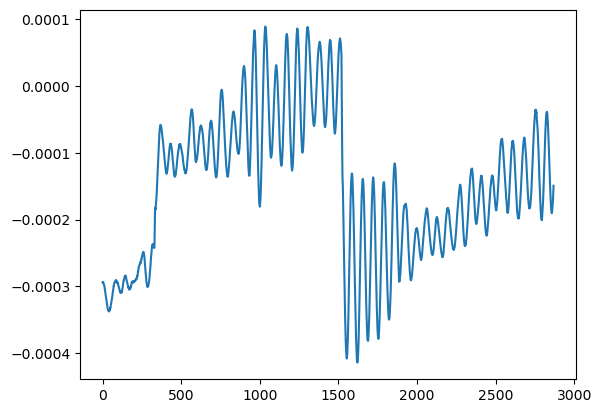

In [62]:
file = 8

t, z = (pd.read_excel(files[file]).to_numpy() * np.array([1, 1e-3])).T
plt.plot(t, z)

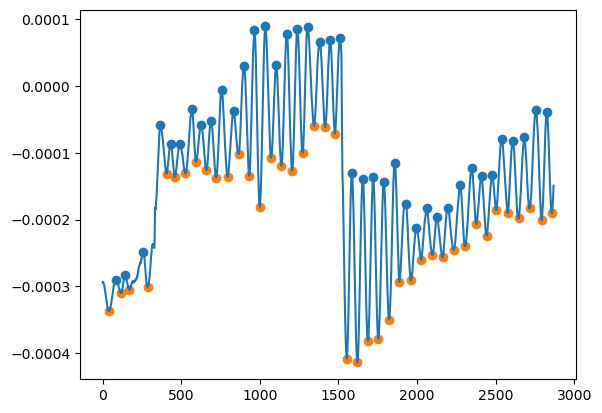

In [100]:
prom = 0.00001

pk_ind, _ = sig.find_peaks(z, prominence = prom)
antipk_ind, _ = sig.find_peaks(-z, prominence = prom)
plt.scatter(t[pk_ind], z[pk_ind])
plt.scatter(t[antipk_ind], z[antipk_ind])
plt.plot(t, z)

In [129]:
def correctizer(x, z, li, ri, prom = 0.00001):
    zs = z[li:ri]
    xs = x[li:ri]
    pk_ind, _ = sig.find_peaks(zs, prominence = prom)
    antipk_ind, _ = sig.find_peaks(-zs, prominence = prom)
    F = lambda x, A, b: A * x + b
    P1, cov1 = opt.curve_fit(F, xs[pk_ind], zs[pk_ind])
    P2, cov2 = opt.curve_fit(F, xs[antipk_ind], zs[antipk_ind])

    return (P1 + P2) / 2


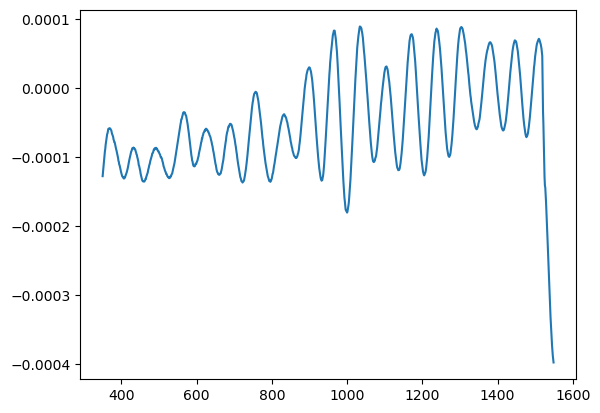

In [131]:
li1 = 350
ri1 = 1550
plt.plot(t[li1:ri1], z[li1:ri1])

In [147]:
A1, b = correctizer(t, z, li1, ri1)

li2 = ri
ri2 = len(z)
A2, _ = correctizer(t, z, li2, ri2)

li0 = 0
ri0 = li1
A0, _ = correctizer(t, z, li0, ri0)

In [149]:
A = (A1 + A2 + A0) / 3
A

1.4502842653919312e-07

In [199]:
lcorr = np.array(range(len(z)))*A1

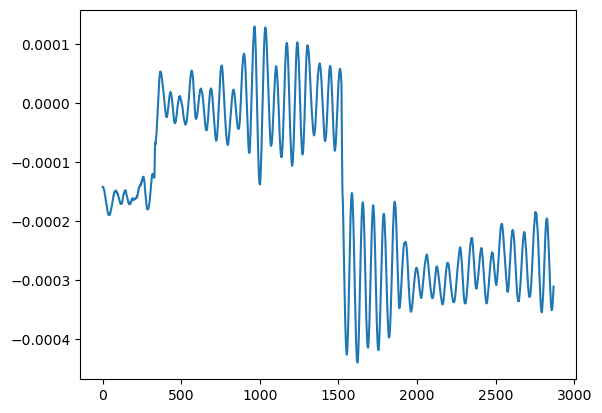

In [201]:
zcorr = z - lcorr - b
plt.plot(t, zcorr)

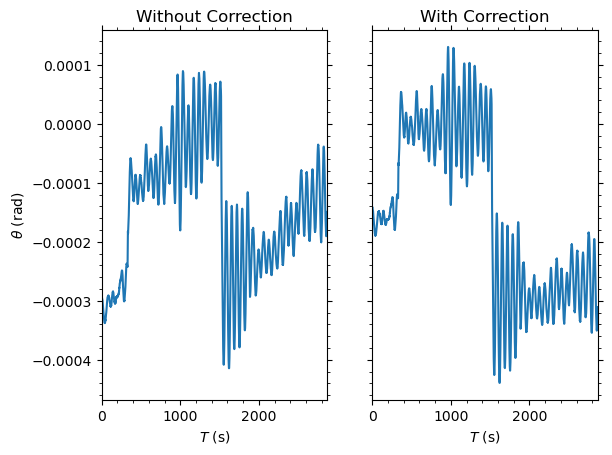

In [286]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.plot(t, z)
ax2.plot(t, zcorr)
ax1.set_ylabel(r"$\theta$ (rad)")
ax1.set_xlabel("$T$ (s)")
ax1.set_title("Without Correction")
ax2.set_xlabel("$T$ (s)")
ax2.set_title("With Correction")
plt.savefig("correction.png")

In [205]:
def averagizer(z, li, ri, prom = 0.00001):
    zs = z[li:ri]
    return np.mean(zs)

In [207]:
a = averagizer(zcorr, li0, ri0)

In [214]:
D1 = averagizer(zcorr, li1, ri1) - a

In [216]:
D2 = averagizer(zcorr, li2, ri2) - a

In [249]:
Ds = (D1 - D2) / 2
Ds

0.00014108178897563953

In [262]:
def Gcalc(K, D, d = 66.5e-3, R = 44.76e-3, M = 874.35e-3, m = 14.9515e-3, mh = .34e-3, mb = 6.5576e-3, fb = 0.19, fd = 0.035):
        num = K * D * R**2
        denom = 2 * M * ((m - mh) * (1-fd) + mb * fd) * d
        return num / denom

In [264]:
K = 1.2741305140287286e-06 # see FD notebook.

In [266]:
Gcalc(K, Ds)

2.1611932300157718e-10